In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [6]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3064,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

In [8]:
import matplotlib.pyplot as plt

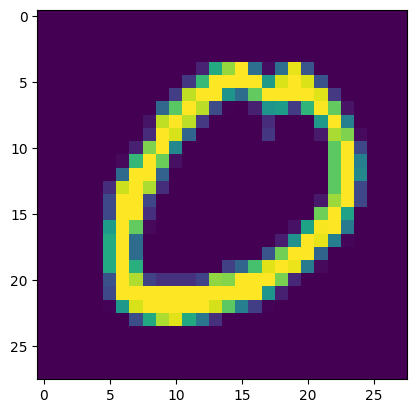

In [9]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [10]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

13.194409608840942


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [18]:
# Now Using PCA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [19]:
x_train_trf = scaler.fit_transform(x_train)
x_test_tr = scaler.transform(x_test)

In [20]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [21]:
x_train_trf= pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [22]:
x_train.shape

(33600, 784)

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(x_test_trf)

In [26]:
accuracy_score(y_test,y_pred)

0.9696428571428571

In [95]:
accuracy_score(y_test,y_pred)

0.9697619047619047

In [96]:
for i in range(1,785):
    pca=PCA(n_components=i)
    x_train_trf= pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(x_train_trf,y_train)
    y_pred = knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred))

0.2729761904761905
0.42214285714285715
0.485
0.6195238095238095
0.7297619047619047
0.8188095238095238
0.8667857142857143
0.8941666666666667


KeyboardInterrupt: 

In [97]:
# Transforming to a 2D coordinate system
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [98]:
x_train_trf

array([[-226.60012975,  305.91706202],
       [  38.32855153, -461.12345123],
       [-305.48759314, -351.68038852],
       ...,
       [ -28.00402187,  596.03366433],
       [ 233.98076078,   18.6933117 ],
       [1096.50176881, -254.72776254]])

In [27]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                y=x_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [100]:
# Transforming in 3D 
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [101]:
x_train_trf

array([[-226.60517238,  305.8942779 ,  417.18072164],
       [  38.33277268, -461.08749244,  100.37263687],
       [-305.49339951, -351.67594137, -961.36449557],
       ...,
       [ -28.00328364,  596.0686762 ,  606.21281004],
       [ 233.97144951,   18.64781984, -148.25151409],
       [1096.5050709 , -254.71197524, -560.30547675]])

In [28]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin = dict(l=20,r=20,t=20,b=20)
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [104]:
pca.explained_variance_
# Explained Variance are our eigen values

array([335506.57620224, 244807.10505003, 212051.03382128])

In [106]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [107]:
pca.explained_variance_ratio_
# When all these three explained variance ratio are sum up then it is
# equal to 12 which explains us that it explains 12% variance of the dataset.

array([0.09770722, 0.07129345, 0.06175413])

In [109]:
pca = PCA (n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [111]:
pca.explained_variance_.shape

(784,)

In [112]:
pca.components_.shape

(784, 784)

In [115]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

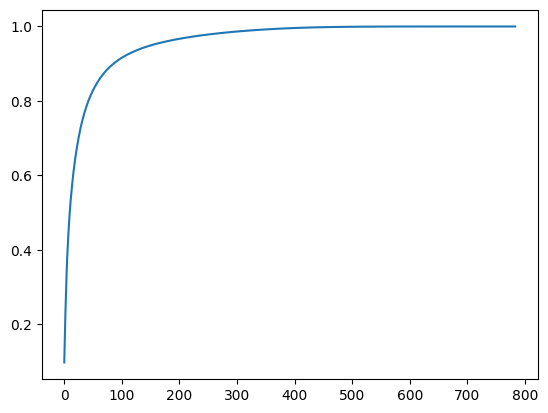

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [117]:
# Always we need to explain 90% variance of our data.